In [88]:
#importing the required libraries and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#creating the data members for the imported classes
le = LabelEncoder()
scaler = StandardScaler()

In [89]:
#reading the data onto a dataframe
dataset = pd.read_csv('C:/Users/Jairam B/Desktop/dataset/train.csv')


In [90]:
dataset.shape


(33750, 14)

In [91]:
dataset.describe()


,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,154.841422,3240.118163
std,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,83.735515,1991.487289
min,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,83.000000,1165.250000
50%,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,155.000000,3335.000000
75%,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,228.000000,4926.000000
max,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,299.000000,7280.000000


In [92]:
#checking the columns to be categorically encoded 
dataset.dtypes

date_time               object
is_holiday              object
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
air_pollution_index      int64
traffic_volume           int64
dtype: object

In [93]:
dataset.is_holiday.unique()


array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [94]:
dataset.isnull().any()

date_time              False
is_holiday             False
humidity               False
wind_speed             False
wind_direction         False
visibility_in_miles    False
dew_point              False
temperature            False
rain_p_h               False
snow_p_h               False
clouds_all             False
weather_type           False
air_pollution_index    False
traffic_volume         False
dtype: bool

In [95]:
#creating x and y dataframes used in regression
y = dataset.air_pollution_index #predicted value
x = dataset.copy()
x = x.drop(['air_pollution_index'], axis = 1)
x = x.drop(['date_time'], axis = 1) #dropping columns which are not required 


In [96]:
#caterogircally encoding weather type and holiday using a boolean mask and sklearn
categorical_feature_mask = x.dtypes==object
categorical_cols = x.columns[categorical_feature_mask].tolist()
x[categorical_cols] = x[categorical_cols].apply(lambda col: le.fit_transform(col))


In [97]:
x

,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
0,7,89,2,329,1,1,288.28,0.0,0.0,40,1,5545
1,7,67,3,330,1,1,289.36,0.0,0.0,75,1,4516
2,7,66,3,329,2,2,289.58,0.0,0.0,90,1,4767
3,7,66,3,329,5,5,290.13,0.0,0.0,90,1,5026
4,7,65,3,329,7,7,291.14,0.0,0.0,75,1,4918
...,...,...,...,...,...,...,...,...,...,...,...,...
33745,7,85,1,328,7,7,287.88,0.0,0.0,90,5,2348
33746,7,70,1,24,2,2,286.95,0.0,0.0,90,6,2194
33747,7,70,1,24,1,1,286.95,0.0,0.0,90,5,2194
33748,7,66,1,42,6,6,285.75,0.0,0.0,90,6,1328


In [98]:
#Dividing the data into testing and training data frames
#80% data is used for training and 20% is used for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [99]:
#scaling the data to managable proportions 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
#running the regression algorithm 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
#checking coefficients seleccted by the algorithm
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
is_holiday,-0.269159
humidity,-0.076414
wind_speed,-0.407725
wind_direction,0.357405
visibility_in_miles,0.042267
dew_point,0.042267
temperature,0.508450
rain_p_h,0.047661
snow_p_h,0.350950
clouds_all,-0.083946


In [102]:
#calculating predicted value
y_pred = regressor.predict(X_test)

In [103]:
#comparing the actual values to the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25)

,Actual,Predicted
10802,216,154.353241
4407,126,155.056389
7745,259,156.141593
12064,56,155.725482
22623,93,155.200225
29772,32,154.750890
9269,149,156.078509
19442,22,155.411628
4832,200,154.039829
14395,217,155.278018


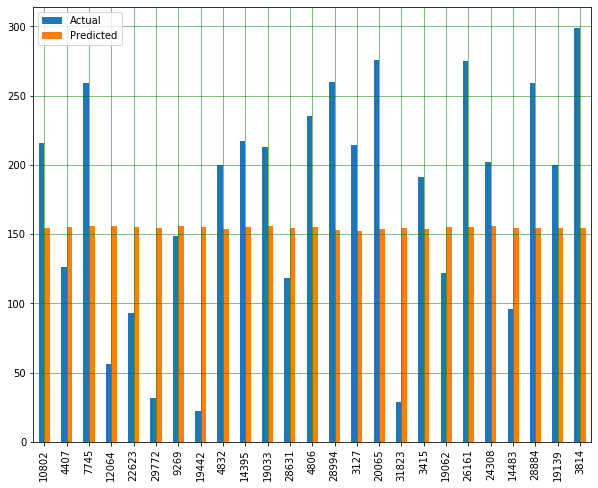

In [104]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [105]:
#displaying error in the predicted values 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 73.26412116755357
Mean Squared Error: 7091.625035892297
Root Mean Squared Error: 84.21178679907165
